# **Predict Customer Clicked Ads Classification by Using Machine Learning**

---
# Data Understanding
---

The source dataset is obtained from Rakamin Academy and comprises 10 features with a total of 1000 rows. The features are described as follows:

| Features                | Description                                            |
|-------------------------|--------------------------------------------------------|
| Daily Time Spent on Site | Time spent by customers on a site in minutes            |
| Age                     | Customer's age                                         |
| Area Income             | Average income in the customer's area                   |
| Daily Internet Usage    | Average daily time customers use the internet (in minutes)      |
| Male                    | Gender of the customer (female/male)                   |
| Timestamp               | Time when customers view the ads                        |
| Clicked on Ad           | Whether the customer clicked on the ads (Yes/No)        |
| City                    | Customer's city address                                |
| Province                | Customer's province address                            |
| Category                | Category of the ads                                     |

---
# Business Understanding
---

A company based in Indonesia is seeking to assess the effectiveness of its broadcasted advertisements. Understanding the success of these marketing efforts is crucial for attracting customers and optimizing the impact of the advertisements. By analyzing historical advertisement data and extracting insights and patterns, the company aims to gain valuable information for setting marketing targets.

The primary objective of this case is to develop a machine learning classification model. This model is designed to identify and classify the right target customers, allowing the company to optimize its marketing strategy. Through the analysis of historical data, the goal is to create a predictive model that can efficiently determine the likelihood of customer engagement with the advertisements. This, in turn, will enable the company to tailor its marketing efforts to reach the most receptive audience, ultimately enhancing the overall effectiveness of its advertising campaigns.

---
# Import Library
---

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from imblearn import over_sampling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import f1_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import shap

import warnings
warnings.filterwarnings('ignore')

In [186]:
print (pd.options.display.max_columns)
pd.options.display.max_columns = 100
print (pd.options.display.max_columns)

100
100


---
# Load Dataset
---

In [187]:
df = pd.read_csv('dataset/Clicked Ads Dataset.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,499691990.0,208.58,Laki-Laki,2/11/2016 21:49,Yes,Semarang,Jawa Tengah,Finance
996,51.30,45,474475190.0,134.42,Laki-Laki,4/22/2016 2:07,Yes,Pakanbaru,Riau,Electronic
997,NaN,51,296910040.0,120.37,Laki-Laki,2/1/2016 17:24,Yes,Samarinda,Kalimantan Timur,Travel
998,55.55,19,293445530.0,187.95,Perempuan,3/24/2016 2:35,No,Tangerang,Banten,Bank


---
# Stage 1: Customer Type And Behaviour Analysis On Advertisement
---

#

## Univariate Analysis

Prior to conducting any data analysis, it is crucial to initially examine the data types of the features and ensure they align accurately with their content. If mismatches are identified, the necessary step is to modify the data types accordingly.

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


One column, namely "Timestamp," has an inappropriate data type as it contains dates. To align with its content and enhance data representation, the data type of the "Timestamp" column will be changed to datetime. This adjustment aims to facilitate more effective handling and analysis of time-related information in the dataset.

In [189]:
df['Timestamp']= pd.to_datetime(df['Timestamp'])

After checking the data type, another crucial step is to conduct a statistical analysis of the data. By checking the statistics, it becomes possible to gain insights into the characteristics of the dataset and identify any anomalies that may influence subsequent analyses.

In [190]:
categorical = ['Male', 'Clicked on Ad', 'city', 'province', 'category']
numerical = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

In [191]:
df[numerical].describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,987.000000,1000.000000,9.870000e+02,989.000000
mean,64.929524,36.009000,3.848647e+08,179.863620
std,15.844699,8.785562,9.407999e+07,43.870142
min,32.600000,19.000000,9.797550e+07,104.780000
25%,51.270000,29.000000,3.286330e+08,138.710000
50%,68.110000,35.000000,3.990683e+08,182.650000
75%,78.460000,42.000000,4.583554e+08,218.790000
max,91.430000,61.000000,5.563936e+08,267.010000


There are no unusual values in the features, but it's observed that certain features exhibit a slight skewness.

In [192]:
df[categorical].describe()

,Male,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000
unique,2,2,30,16,10
top,Perempuan,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,500,64,253,112


There are no unusual values in the features, but at column 'Male' has missing value, this will be analyzed further in data preprocessing.

### Distribution of Categoric Column

- Gender

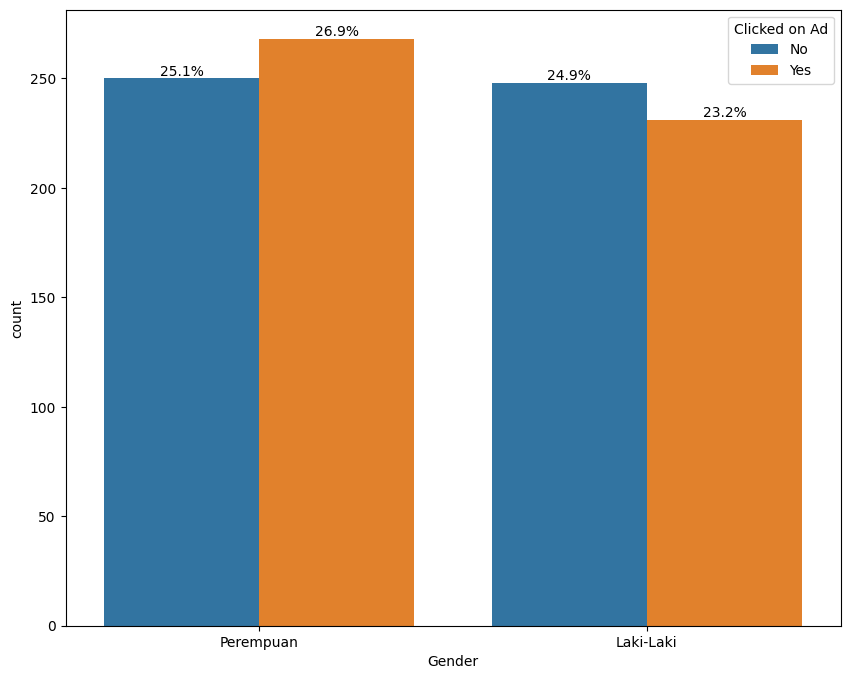

In [193]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df, x='Male', hue='Clicked on Ad')
for c in ax.containers:
    labels = [f'{h/df.Male.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
ax.set_xlabel('Gender')
plt.show()

Analyzing the distribution of gender, it is observed that the number of data for 'Perempuan' and 'Laki-Laki' is relatively balanced. However, a notable observation is that 'Perempuan' is more likely to click on ads compared to 'Laki-Laki.' This observation leads to the assumption that the higher click rate among women may be attributed to the likelihood that most advertisements pertain to products predominantly used by women. This insight highlights the potential influence of gender in ad engagement and could inform targeted marketing strategies.

- province

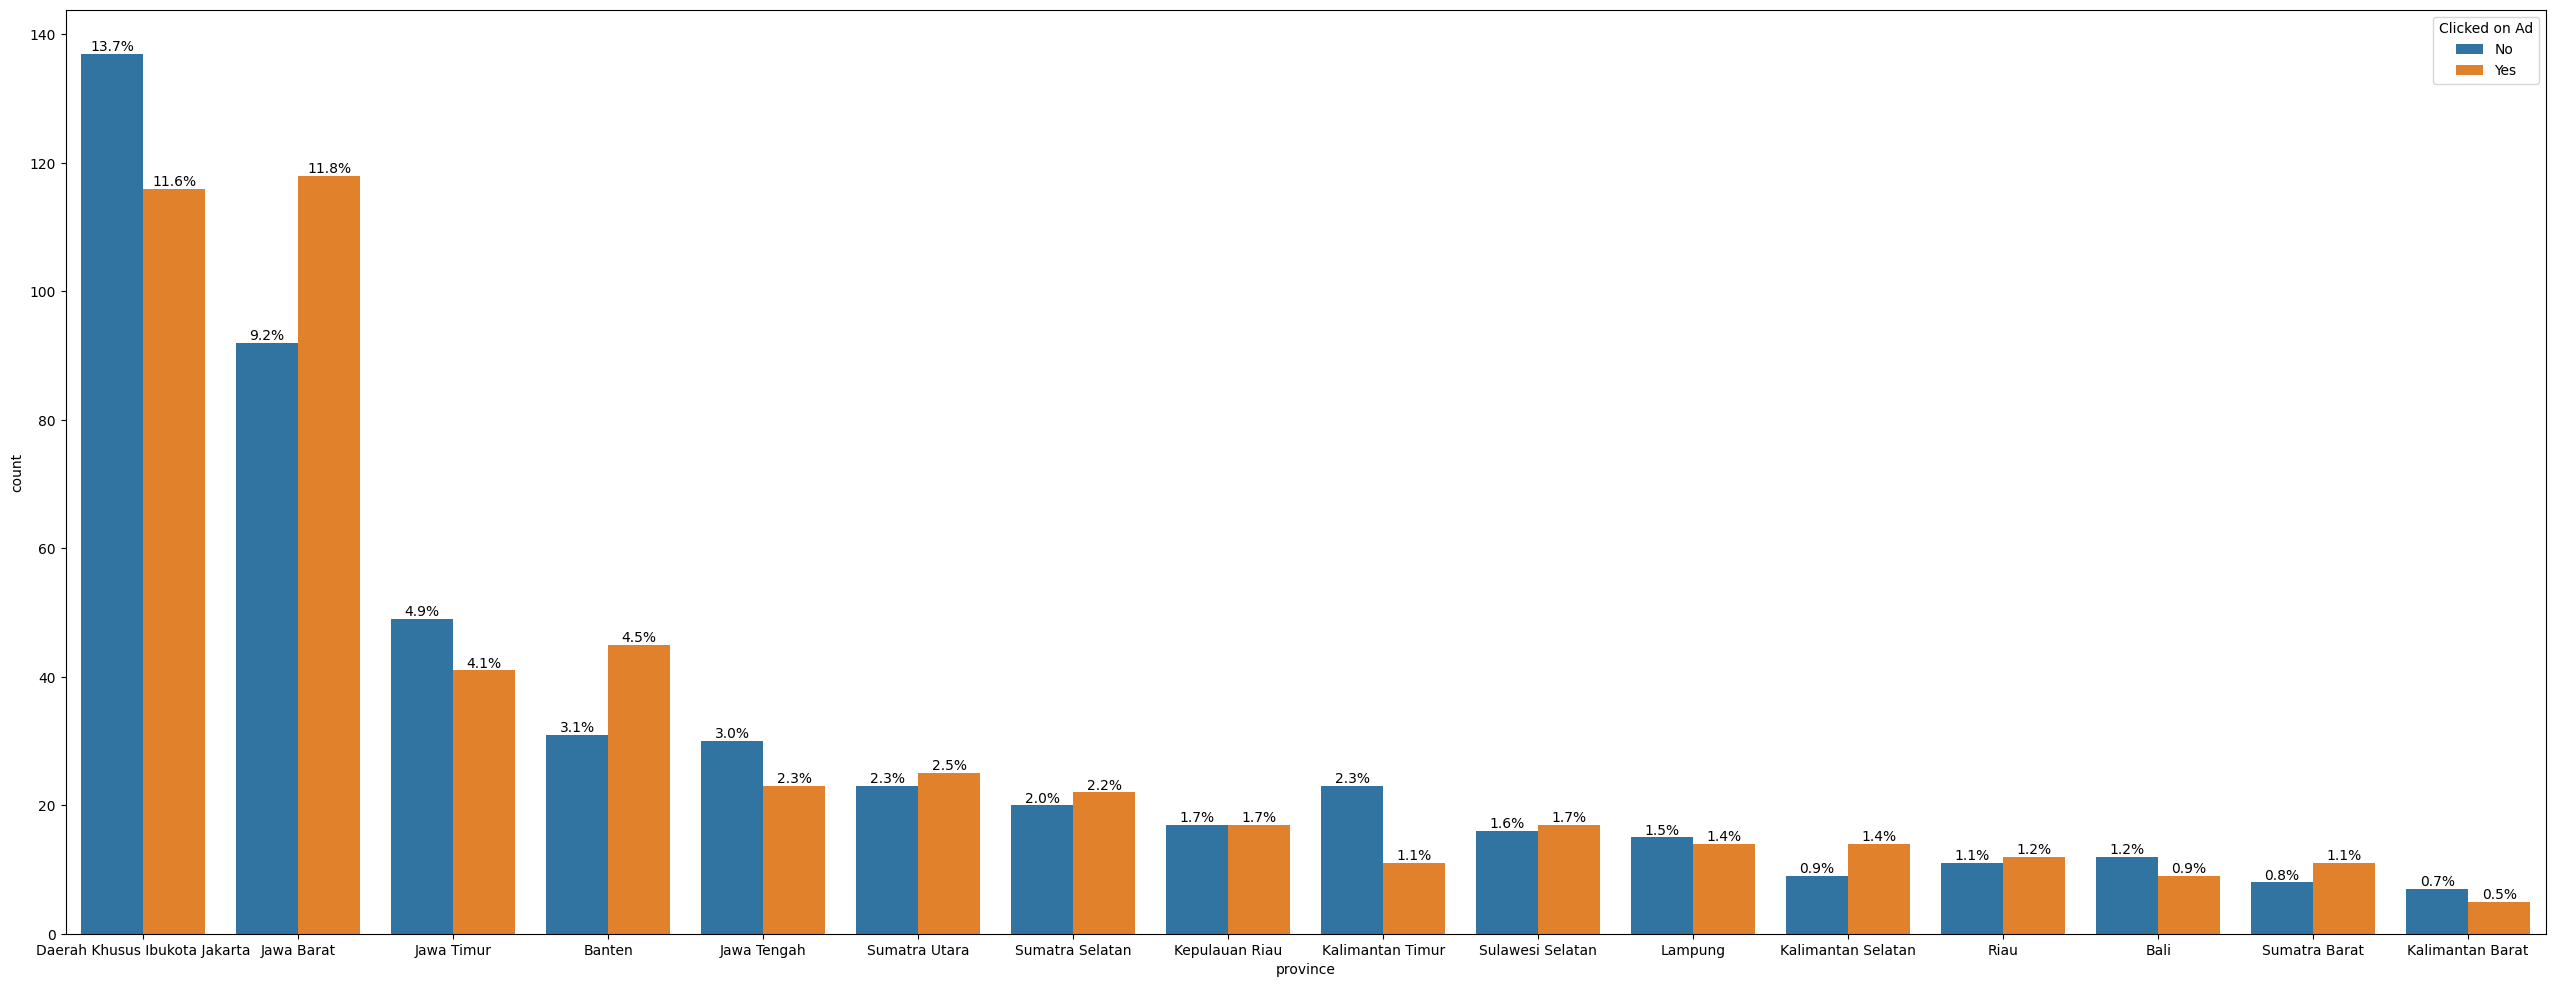

In [194]:
plt.figure(figsize=(32, 12))
ax = sns.countplot(data=df, x='province', hue='Clicked on Ad', order=df.province.value_counts().index)
for c in ax.containers:
    labels = [f'{h/df.province.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.show()

Analyzing the data based on provinces, it is evident that 'Daerah Khusus Ibukota Jakarta' and 'Jawa Barat' have the highest number of customers and exhibit a significant difference compared to other provinces. Moving on to the number and percentage of clicked-on ads, three distinct categories emerge: 

1. Majority Clicked the Ads: Provinces where the majority of customers clicked on ads. (Jawa Barat, Banten, Sumatra Selatan, Sulawesi Selatan, Kalimantan Selatan, Riau, Sumatra Barat)
2. Majority Didn't Click the Ads: Provinces where the majority of customers did not click on ads. (Daerah Khusus Ibukota Jakarta, Jawa Timur, Jawa Tengah, Kalimantan Timur, Lampung, Bali, Kalimantan Barat)
3. Balanced: Provinces where the distribution of clicked and non-clicked ads is relatively even. (Kepulauan Riau)

This categorization provides valuable insights into regional variations in ad engagement, allowing for targeted strategies based on the predominant behavior in each province.

### Distribution of Numeric Column

- Age

To simplify the representation of age, it is proposed to categorize age into three groups:
- Young Adults: 0-29 Years
- Middle Adults: 30-49 Years
- Old Adults: > 49 Years

This categorization provides a clearer and more manageable way to analyze and interpret age-related patterns in the dataset.

In [195]:
df["Age_Group"] = np.where(df["Age"] < 30, 'Young Adults', 
            (np.where(df["Age"] <= 49 , 'Middle Adults', 'Old Adults')))
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Age_Group
0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,Middle Adults
1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food,Middle Adults
2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic,Young Adults
3,74.15,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House,Young Adults
4,68.37,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance,Middle Adults
...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,499691990.0,208.58,Laki-Laki,2016-02-11 21:49:00,Yes,Semarang,Jawa Tengah,Finance,Middle Adults
996,51.30,45,474475190.0,134.42,Laki-Laki,2016-04-22 02:07:00,Yes,Pakanbaru,Riau,Electronic,Middle Adults
997,NaN,51,296910040.0,120.37,Laki-Laki,2016-02-01 17:24:00,Yes,Samarinda,Kalimantan Timur,Travel,Old Adults
998,55.55,19,293445530.0,187.95,Perempuan,2016-03-24 02:35:00,No,Tangerang,Banten,Bank,Young Adults


In [196]:
age = df.groupby(['Age_Group', 'Clicked on Ad']).agg({
    'Age_Group' : ['count']
}).reset_index()
age.columns = ['Age_Group', 'Clicked on Ad', 'Count']
sorted_age = ['Young Adults', 'Middle Adults', 'Old Adults']
age['Age_Group'] = pd.Categorical(age['Age_Group'], sorted_age)
age.sort_values(['Age_Group'])
age

,Age_Group,Clicked on Ad,Count
0,Middle Adults,No,297
1,Middle Adults,Yes,347
2,Old Adults,No,4
3,Old Adults,Yes,88
4,Young Adults,No,199
5,Young Adults,Yes,65


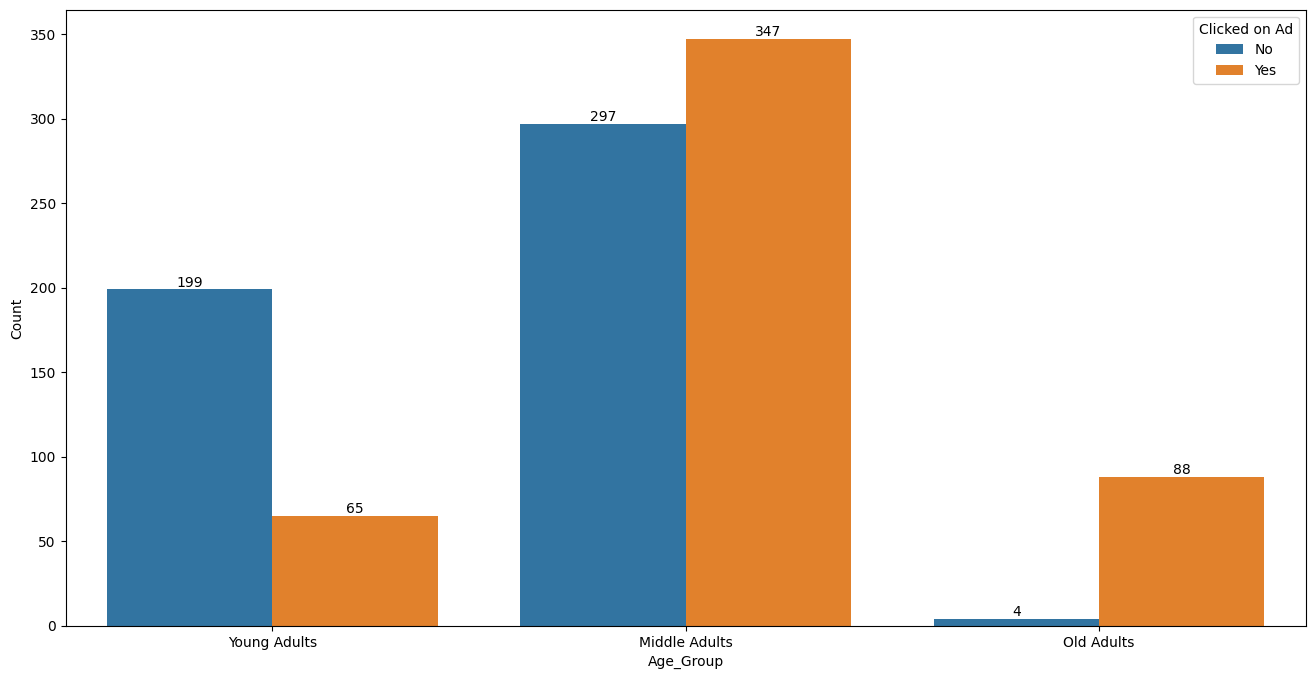

In [197]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='Age_Group', y='Count', data=age, hue='Clicked on Ad')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Analyzing the age distribution, it is observed that the majority of customers in the Middle Adults and Old Adults groups tend to click on ads. In contrast, among Young Adults, the majority of customers do not click on ads. This insight highlights variations in ad engagement patterns across different age groups, suggesting that marketing strategies may need to be tailored to the preferences and behaviors of specific age demographics.

- Daily Time Spent on Site

Similar to the age column, it is proposed to categorize another column for simplifying representation. The suggested categories are as follows:

- 30-45: Short
- 46-60: Medium
- 61-75: Long enough
- '>' 75: Long

This categorization aims to enhance the clarity and ease of interpretation for the specified column.

In [198]:
df["Timespent_Group"] = np.where(df["Daily Time Spent on Site"] < 45, 'Short', 
            (np.where(df["Daily Time Spent on Site"] <= 60 , 'Medium', 
            (np.where(df["Daily Time Spent on Site"] <= 75 , 'Long enough', 'Long')))))
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Age_Group,Timespent_Group
0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,Middle Adults,Long enough
1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food,Middle Adults,Long
2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic,Young Adults,Long enough
3,74.15,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House,Young Adults,Long enough
4,68.37,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance,Middle Adults,Long enough
...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,499691990.0,208.58,Laki-Laki,2016-02-11 21:49:00,Yes,Semarang,Jawa Tengah,Finance,Middle Adults,Long enough
996,51.30,45,474475190.0,134.42,Laki-Laki,2016-04-22 02:07:00,Yes,Pakanbaru,Riau,Electronic,Middle Adults,Medium
997,NaN,51,296910040.0,120.37,Laki-Laki,2016-02-01 17:24:00,Yes,Samarinda,Kalimantan Timur,Travel,Old Adults,Long
998,55.55,19,293445530.0,187.95,Perempuan,2016-03-24 02:35:00,No,Tangerang,Banten,Bank,Young Adults,Medium


In [199]:
Timespent = df.groupby(['Timespent_Group', 'Clicked on Ad']).agg({
    'Timespent_Group' : ['count']
}).reset_index()
Timespent.columns = ['Timespent_Group', 'Clicked on Ad', 'Count']
sorted_Timespent = ['Short', 'Medium', 'Long enough', 'Long']
Timespent['Timespent_Group'] = pd.Categorical(Timespent['Timespent_Group'], sorted_Timespent)
Timespent.sort_values(['Timespent_Group'])
Timespent

,Timespent_Group,Clicked on Ad,Count
0,Long,No,320
1,Long,Yes,36
2,Long enough,No,166
3,Long enough,Yes,114
4,Medium,No,14
5,Medium,Yes,185
6,Short,Yes,165


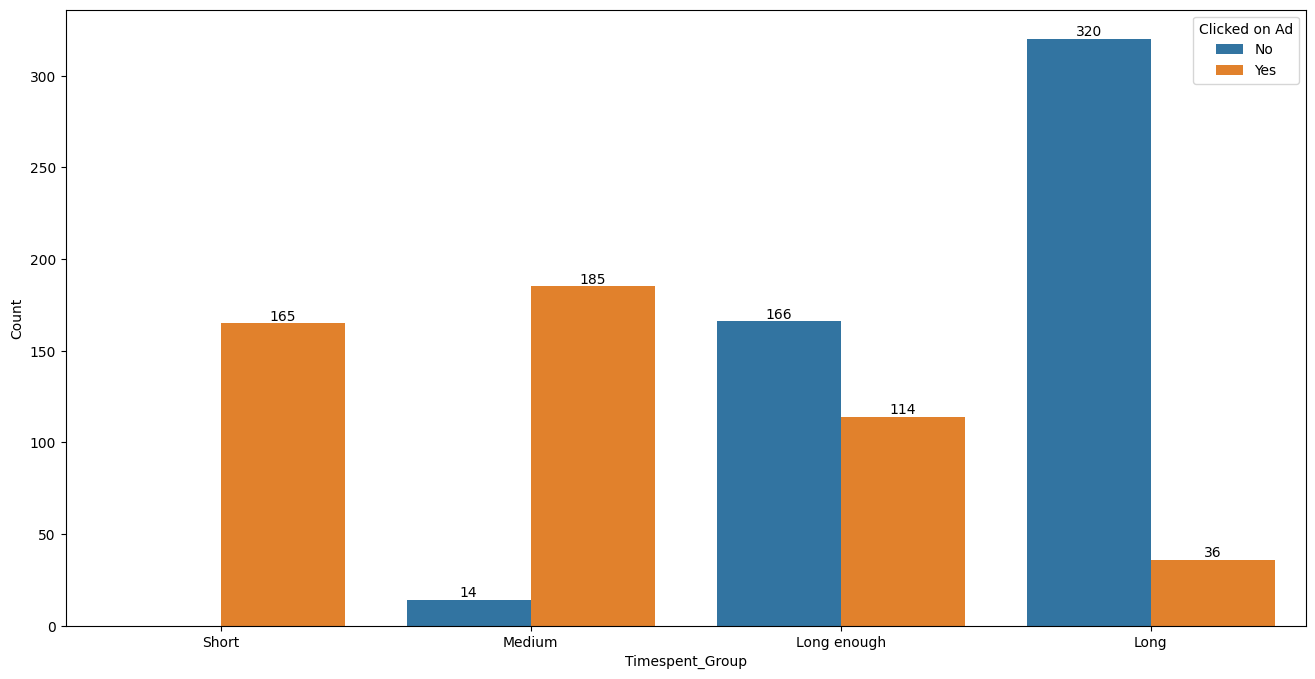

In [200]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='Timespent_Group', y='Count', data=Timespent, hue='Clicked on Ad')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

The analysis of the time spent on the site reveals an interesting trend: as the time spent on the site increases, the likelihood of customers not clicking on ads also increases. This suggests an inverse relationship between the duration of site engagement and ad click-through rates. Further exploration into the factors influencing this pattern could provide valuable insights for optimizing ad engagement strategies.

- Daily Internet Usage

Similar to the Daily Time Spent on Site column. Following is The suggested categories are as follows:

- '<' 125: Short
- '<=' 175: Medium
- '<=' 225: Long enough
- '>' 225: Long

In [201]:
df["DailyInternet_Group"] = np.where(df["Daily Internet Usage"] < 125, 'Short', 
            (np.where(df["Daily Internet Usage"] <= 175 , 'Medium', 
            (np.where(df["Daily Internet Usage"] <= 225 , 'Long enough', 'Long')))))
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Age_Group,Timespent_Group,DailyInternet_Group
0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,Middle Adults,Long enough,Long
1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food,Middle Adults,Long,Long enough
2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic,Young Adults,Long enough,Long
3,74.15,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House,Young Adults,Long enough,Long
4,68.37,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance,Middle Adults,Long enough,Long
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,499691990.0,208.58,Laki-Laki,2016-02-11 21:49:00,Yes,Semarang,Jawa Tengah,Finance,Middle Adults,Long enough,Long enough
996,51.30,45,474475190.0,134.42,Laki-Laki,2016-04-22 02:07:00,Yes,Pakanbaru,Riau,Electronic,Middle Adults,Medium,Medium
997,NaN,51,296910040.0,120.37,Laki-Laki,2016-02-01 17:24:00,Yes,Samarinda,Kalimantan Timur,Travel,Old Adults,Long,Short
998,55.55,19,293445530.0,187.95,Perempuan,2016-03-24 02:35:00,No,Tangerang,Banten,Bank,Young Adults,Medium,Long enough


In [202]:
Timespent_DailyInternet = df.groupby(['DailyInternet_Group', 'Clicked on Ad']).agg({
    'DailyInternet_Group' : ['count']
}).reset_index()
Timespent_DailyInternet.columns = ['DailyInternet_Group', 'Clicked on Ad', 'Count']
sorted_Timespent_DailyInternet = ['Short', 'Medium', 'Long enough', 'Long']
Timespent_DailyInternet['DailyInternet_Group'] = pd.Categorical(Timespent_DailyInternet['DailyInternet_Group'], sorted_Timespent_DailyInternet)
Timespent_DailyInternet.sort_values(['DailyInternet_Group'])
Timespent_DailyInternet

,DailyInternet_Group,Clicked on Ad,Count
0,Long,No,190
1,Long,Yes,15
2,Long enough,No,277
3,Long enough,Yes,56
4,Medium,No,33
5,Medium,Yes,290
6,Short,Yes,139


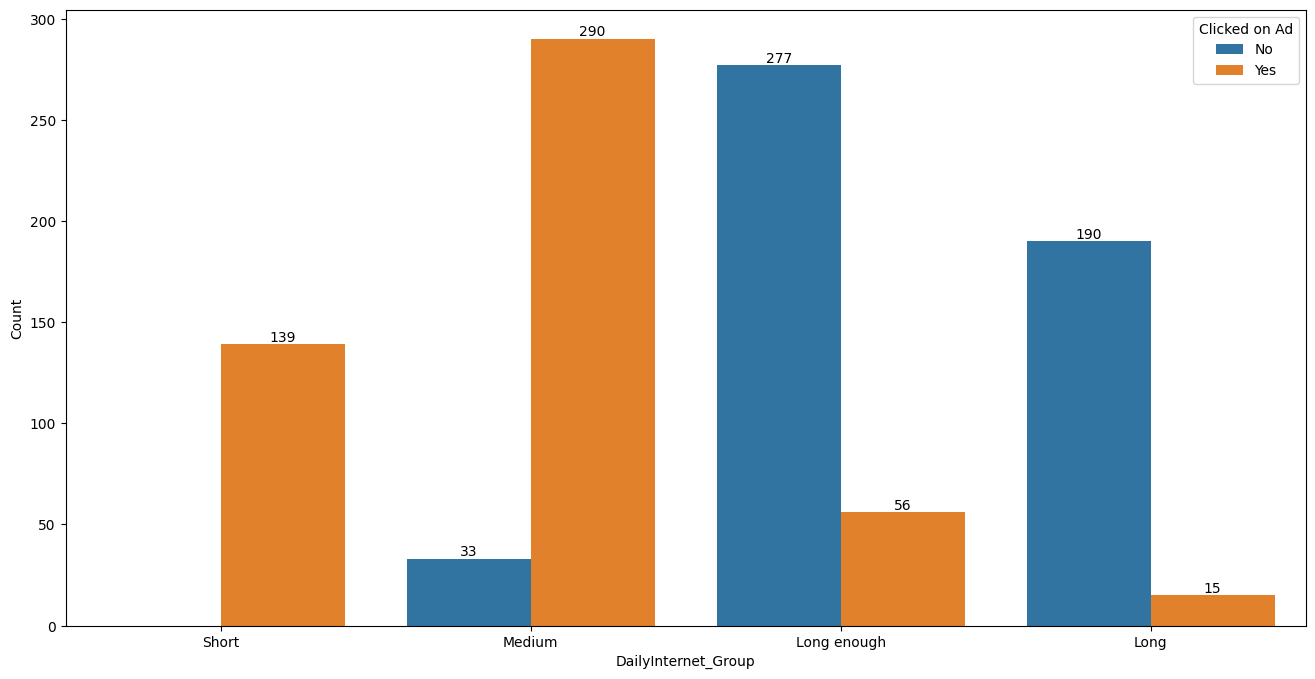

In [203]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='DailyInternet_Group', y='Count', data=Timespent_DailyInternet, hue='Clicked on Ad')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

The analysis indicates that customers in the "Short" and "Medium" categories of internet usage time are more likely to click on ads. On the other hand, customers in the "Long enough" and "Long" categories are more inclined not to click on ads. This observation suggests a correlation between internet usage duration and ad engagement, emphasizing the importance of considering user behavior patterns for targeted marketing strategies.

- Timestamp

In [204]:
df['Timestamp']

0     2016-03-27 00:53:00
1     2016-04-04 01:39:00
2     2016-03-13 20:35:00
3     2016-01-10 02:31:00
4     2016-06-03 03:36:00
              ...        
995   2016-02-11 21:49:00
996   2016-04-22 02:07:00
997   2016-02-01 17:24:00
998   2016-03-24 02:35:00
999   2016-06-03 21:43:00
Name: Timestamp, Length: 1000, dtype: datetime64[ns]

In [205]:
df['Timestamp_time'] = df['Timestamp'].dt.strftime('%H')
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Age_Group,Timespent_Group,DailyInternet_Group,Timestamp_time
0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,Middle Adults,Long enough,Long,00
1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food,Middle Adults,Long,Long enough,01
2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic,Young Adults,Long enough,Long,20
3,74.15,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House,Young Adults,Long enough,Long,02
4,68.37,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance,Middle Adults,Long enough,Long,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,499691990.0,208.58,Laki-Laki,2016-02-11 21:49:00,Yes,Semarang,Jawa Tengah,Finance,Middle Adults,Long enough,Long enough,21
996,51.30,45,474475190.0,134.42,Laki-Laki,2016-04-22 02:07:00,Yes,Pakanbaru,Riau,Electronic,Middle Adults,Medium,Medium,02
997,NaN,51,296910040.0,120.37,Laki-Laki,2016-02-01 17:24:00,Yes,Samarinda,Kalimantan Timur,Travel,Old Adults,Long,Short,17
998,55.55,19,293445530.0,187.95,Perempuan,2016-03-24 02:35:00,No,Tangerang,Banten,Bank,Young Adults,Medium,Long enough,02


In [206]:
time = df.groupby(['Timestamp_time', 'Clicked on Ad']).agg({
    'Timestamp_time' : ['count']
}).reset_index()
time.columns = ['time', 'Clicked on Ad', 'count']
temp = time.groupby(['time']).agg({'count':'sum'}).reset_index()
time = pd.merge(time, temp, on=['time'])
time.columns = ['time', 'Clicked on Ad', 'count', 'count_byTime']
time['percentage'] = time.apply(lambda x: float(x['count'])/float(x['count_byTime'])*100, axis=1)
time

,time,Clicked on Ad,count,count_byTime,percentage
0,00,No,19,45,42.222222
1,00,Yes,26,45,57.777778
2,01,No,16,32,50.000000
3,01,Yes,16,32,50.000000
4,02,No,19,36,52.777778
5,02,Yes,17,36,47.222222
6,03,No,19,42,45.238095
7,03,Yes,23,42,54.761905
8,04,No,21,42,50.000000
9,04,Yes,21,42,50.000000


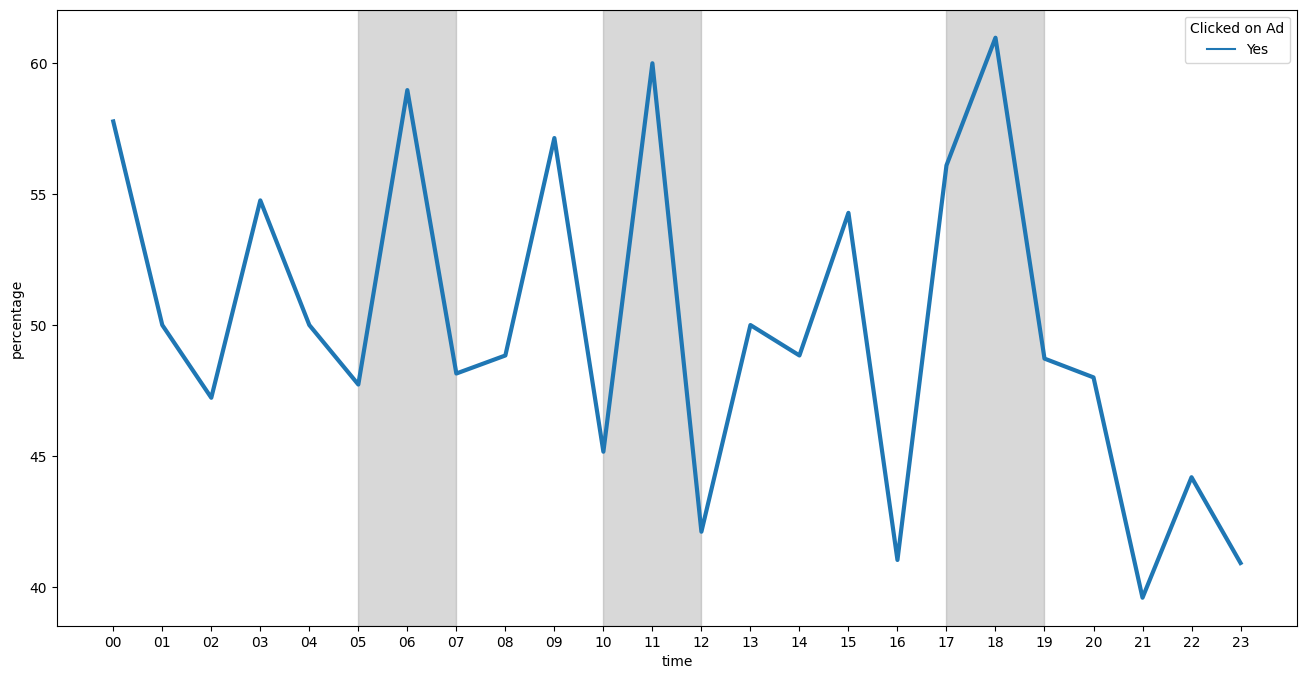

In [207]:
plt.figure(figsize=(16, 8))
ax = sns.lineplot(x = "time", y = "percentage", hue = "Clicked on Ad", data = time[time['Clicked on Ad'] == 'Yes'], linewidth = 3)
ax.axvspan('05', '07', color='grey', alpha=0.3)
ax.axvspan('10', '12', color='grey', alpha=0.3)
ax.axvspan('17', '19', color='grey', alpha=0.3)
plt.show()

According to the line plot representing the percentage of clicked ads, three distinct peak times are observed at 06:00, 11:00, and 18:00. These time intervals demonstrate higher percentages of ads being clicked, indicating potential patterns in customer engagement with advertisements during these specific hours.

## Bivariate Analysis

In [208]:
column_bivariate = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Timestamp_time', 'Clicked on Ad']

<Figure size 1000x800 with 0 Axes>

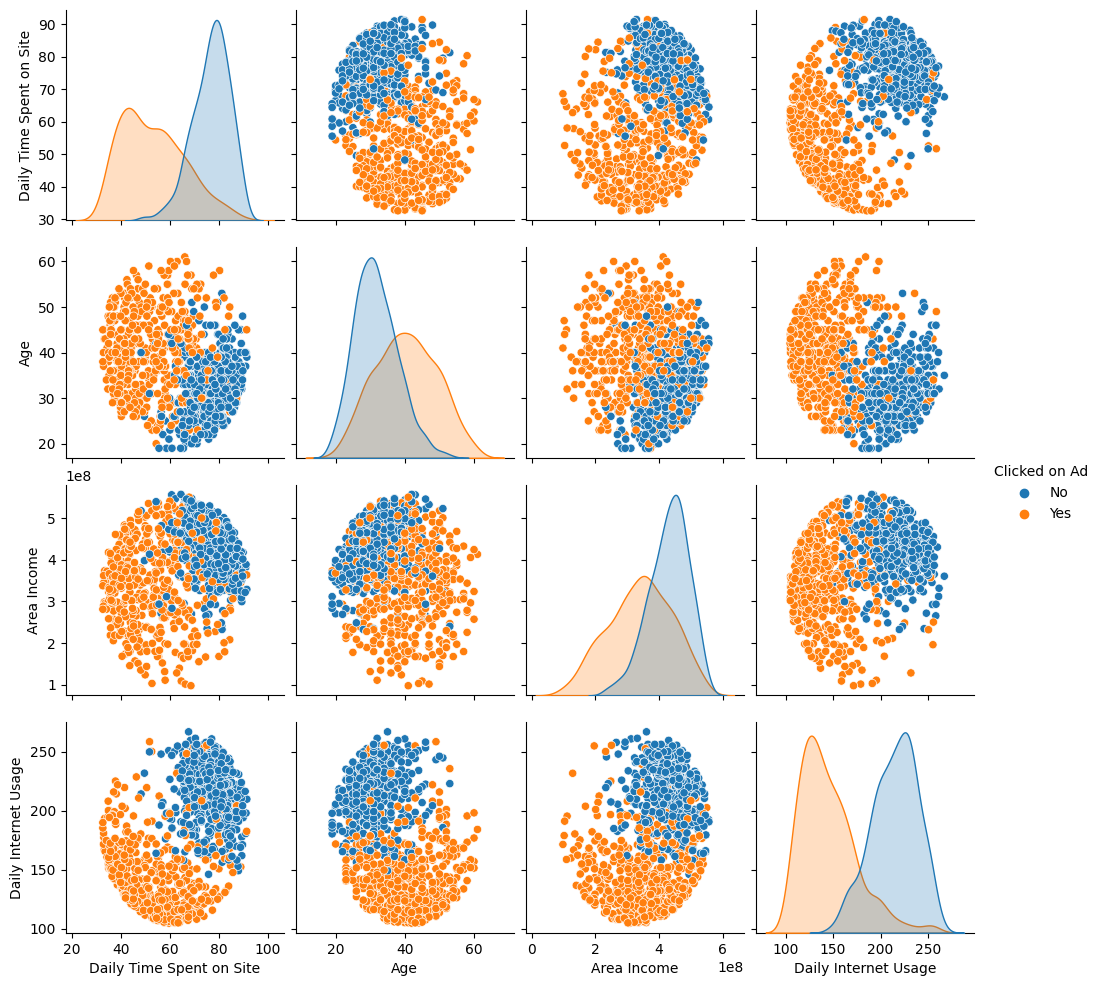

In [209]:
plt.figure(figsize=(10, 8))
sns.pairplot(df[column_bivariate], diag_kind='kde', hue='Clicked on Ad')
plt.show()

Based on the pair plot analysis, several patterns emerge in the distribution of data across different column relationships:

1. **Daily Time Spent on Site and Age:**
   - When the daily time spent on the site is long and the age is young, the customer is more likely not to click on ads.

2. **Daily Time Spent on Site and Area Income:**
   - When the daily time spent on the site is long and the area income is high, the customer is more likely not to click on ads.

3. **Daily Time Spent on Site and Daily Internet Usage:**
   - When both daily time spent on the site and daily internet usage are long, the customer is more likely not to click on ads.

4. **Age and Area Income:**
   - When the age is young and the area income is high, the customer is more likely not to click on ads.

5. **Age and Daily Internet Usage:**
   - When the age is young and the daily internet usage is long, the customer is more likely not to click on ads.

6. **Area Income and Daily Internet Usage:**
   - When the area income is high and daily internet usage is long, the customer is more likely not to click on ads.

These patterns provide valuable insights into potential relationships between different features and the likelihood of customers clicking on ads. Understanding these patterns can inform targeted marketing strategies.

## Correlation 

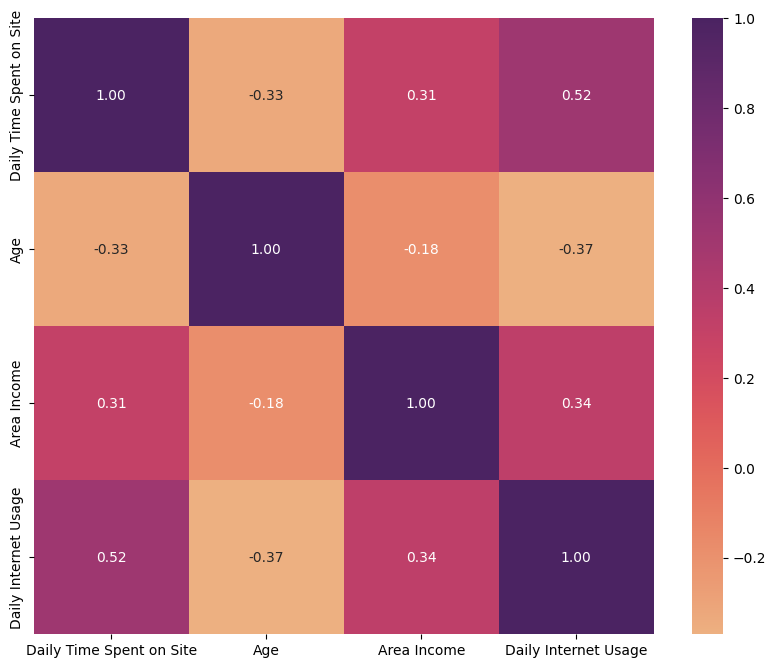

In [210]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical].corr(), cmap='flare', annot=True, fmt='.2f')
plt.show()

According to the correlation analysis, there are no columns that indicate redundancy, meaning there are no strong correlations (more than +-0.70) between columns. This suggests that the features in the dataset are relatively independent of each other and can be individually valuable for modeling and analysis without introducing multicollinearity issues.

---
# Stage 2: Data Cleaning & Preprocessing
---

Before proceeding with modeling, data cleaning, and preprocessing are critical steps to ensure optimal results from the model. The following are data cleaning and preprocessing steps undertaken:

### Checking and Handling Missing Data

In [211]:
df.isnull().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
Age_Group                    0
Timespent_Group              0
DailyInternet_Group          0
Timestamp_time               0
dtype: int64

In [212]:
feature_null = ['Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage', 'Male']
df[feature_null].describe()

,Daily Time Spent on Site,Area Income,Daily Internet Usage
count,987.000000,9.870000e+02,989.000000
mean,64.929524,3.848647e+08,179.863620
std,15.844699,9.407999e+07,43.870142
min,32.600000,9.797550e+07,104.780000
25%,51.270000,3.286330e+08,138.710000
50%,68.110000,3.990683e+08,182.650000
75%,78.460000,4.583554e+08,218.790000
max,91.430000,5.563936e+08,267.010000


To avoid altering the distribution of data, the 'Daily Time Spent on Site,' 'Area Income,' and 'Daily Internet Usage' columns will be imputed using the median value. Imputing with the median is a robust method that is less sensitive to outliers, ensuring that the central tendency of the data is maintained without introducing bias.

In [213]:
df[df['Male'].isnull()]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Age_Group,Timespent_Group,DailyInternet_Group,Timestamp_time
620,81.75,24,368592910.0,190.08,NaN,2016-04-29 18:53:00,No,Bogor,Jawa Barat,Electronic,Young Adults,Long,Long enough,18
656,85.24,31,NaN,182.84,NaN,2016-06-17 03:23:00,No,Denpasar,Bali,House,Middle Adults,Long,Long enough,03
817,54.47,23,327460630.0,141.52,NaN,2016-03-26 19:37:00,Yes,Medan,Sumatra Utara,Otomotif,Young Adults,Medium,Medium,19


For the 'Age' column, considering that 'Perempuan' is more likely to click on ads, the data points where 'Clicked on Ad' is 'Yes' will be filled with 'Perempuan,' while the remaining data points will be filled with 'Laki-Laki.' This strategy is based on the observed trend in ad engagement related to gender.

In [214]:
def gender_na(x):
    if pd.isnull(x['Male']):
        if x['Clicked on Ad'] == 'Yes':
            return 'Perempuan'
        else:
            return 'Laki-Laki'
    else:
        return x['Male']

df[['Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage']] = df[['Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage']].fillna(df[['Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage']].median())
df['Male'] = df.apply(lambda x: gender_na(x), axis=1)

In [215]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
Age_Group                   0
Timespent_Group             0
DailyInternet_Group         0
Timestamp_time              0
dtype: int64

## Checking and Handling Duplicated Data

In [216]:
df.duplicated().sum()

0

There is no duplicate value.

## Feature Engineering

It is essential to perform feature engineering on timestamps, as they hold valuable temporal information. Extracting features like hour, date, month, and year from timestamps can significantly enhance the dataset, capturing important time-related patterns and trends that contribute to improving the model's predictive capabilities. Previously, feature engineering had been carried out for hour from timestamps.

In [217]:
df['Timestamp_date'] = df['Timestamp'].dt.day
df['Timestamp_month'] = df['Timestamp'].dt.month
df['Timestamp_year'] = df['Timestamp'].dt.year
df['Timestamp_time'] = df['Timestamp_time'].astype(int)
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Age_Group,Timespent_Group,DailyInternet_Group,Timestamp_time,Timestamp_date,Timestamp_month,Timestamp_year
0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,Middle Adults,Long enough,Long,0,27,3,2016
1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food,Middle Adults,Long,Long enough,1,4,4,2016
2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic,Young Adults,Long enough,Long,20,13,3,2016
3,74.15,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House,Young Adults,Long enough,Long,2,10,1,2016
4,68.37,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance,Middle Adults,Long enough,Long,3,3,6,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,499691990.0,208.58,Laki-Laki,2016-02-11 21:49:00,Yes,Semarang,Jawa Tengah,Finance,Middle Adults,Long enough,Long enough,21,11,2,2016
996,51.30,45,474475190.0,134.42,Laki-Laki,2016-04-22 02:07:00,Yes,Pakanbaru,Riau,Electronic,Middle Adults,Medium,Medium,2,22,4,2016
997,68.11,51,296910040.0,120.37,Laki-Laki,2016-02-01 17:24:00,Yes,Samarinda,Kalimantan Timur,Travel,Old Adults,Long,Short,17,1,2,2016
998,55.55,19,293445530.0,187.95,Perempuan,2016-03-24 02:35:00,No,Tangerang,Banten,Bank,Young Adults,Medium,Long enough,2,24,3,2016


In [218]:
df.drop('Timestamp', axis = 1, inplace = True)

## Feature Selection

Before continuing to do data preprocessing, it's better to do feature selection first so that the preprocessing step will be more efficient. (because many features are created to easier EDA before)

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   object 
 5   Clicked on Ad             1000 non-null   object 
 6   city                      1000 non-null   object 
 7   province                  1000 non-null   object 
 8   category                  1000 non-null   object 
 9   Age_Group                 1000 non-null   object 
 10  Timespent_Group           1000 non-null   object 
 11  DailyInternet_Group       1000 non-null   object 
 12  Timestamp_time            1000 non-null   int32  
 13  Timestamp_date            1000 non-null   int32  
 14  Timestamp

- The columns 'Age_Group', 'Timespent_Group', and 'DailyInternet_Group' will be dropped from the dataset. These features, having been derived from other features, do not introduce distinct information and are considered more general in nature. Therefore, their removal aims to streamline the dataset and eliminate redundancy.
- City and Province are considered not related to customers on clicked the ads, so this column also will be dropped.

In [220]:
df.drop(['Age_Group', 'Timespent_Group', 'DailyInternet_Group', 'city', 'province'], axis = 1, inplace = True)

## Feature Encoding

With three categorical columns present, feature encoding will be applied to transform these categorical variables into a format suitable for model input. This step is essential to ensure that the categorical information can be effectively utilized in the machine learning model. Common techniques for feature encoding include one-hot encoding or label encoding. Label encoding will be employed for 'Male' and 'Clicked on Ad' columns, given that these columns have only two distinct values. For the 'Category' column, which contains more than two distinct values, one-hot encoding will be utilized. 

In [221]:
mapping_Gender={
    'Laki-Laki' : 0,
    'Perempuan' : 1 #Because Perempuan its more likely to click the ads
}
df['Male'] = df['Male'].map(mapping_Gender)

mapping_clickedAds={
    'No' : 0,
    'Yes' : 1 
}
df['Clicked on Ad'] = df['Feature Encoding'].map(mapping_clickedAds)
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,category,Timestamp_time,Timestamp_date,Timestamp_month,Timestamp_year
0,68.95,35,432837300.0,256.09,1,0,Furniture,0,27,3,2016
1,80.23,31,479092950.0,193.77,0,0,Food,1,4,4,2016
2,69.47,26,418501580.0,236.50,1,0,Electronic,20,13,3,2016
3,74.15,29,383643260.0,245.89,0,0,House,2,10,1,2016
4,68.37,35,517229930.0,225.58,1,0,Finance,3,3,6,2016
...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,499691990.0,208.58,0,1,Finance,21,11,2,2016
996,51.30,45,474475190.0,134.42,0,1,Electronic,2,22,4,2016
997,68.11,51,296910040.0,120.37,0,1,Travel,17,1,2,2016
998,55.55,19,293445530.0,187.95,1,0,Bank,2,24,3,2016


In [222]:
df = pd.get_dummies(df, columns = ['category'], dtype=int)
df 

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Timestamp_time,Timestamp_date,Timestamp_month,Timestamp_year,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,68.95,35,432837300.0,256.09,1,0,0,27,3,2016,0,0,0,0,0,1,0,0,0,0
1,80.23,31,479092950.0,193.77,0,0,1,4,4,2016,0,0,0,0,1,0,0,0,0,0
2,69.47,26,418501580.0,236.50,1,0,20,13,3,2016,0,1,0,0,0,0,0,0,0,0
3,74.15,29,383643260.0,245.89,0,0,2,10,1,2016,0,0,0,0,0,0,0,1,0,0
4,68.37,35,517229930.0,225.58,1,0,3,3,6,2016,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,499691990.0,208.58,0,1,21,11,2,2016,0,0,0,1,0,0,0,0,0,0
996,51.30,45,474475190.0,134.42,0,1,2,22,4,2016,0,1,0,0,0,0,0,0,0,0
997,68.11,51,296910040.0,120.37,0,1,17,1,2,2016,0,0,0,0,0,0,0,0,0,1
998,55.55,19,293445530.0,187.95,1,0,2,24,3,2016,1,0,0,0,0,0,0,0,0,0


## Splitting Data

In [223]:
X = df.drop(['Clicked on Ad'], axis=1)
y = df['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state= 31)

## Feature Scaling

Given the varied range of values in each column, feature scaling is implemented using MinMaxScaler to ensure consistency. This scaling technique is chosen to maintain the original distribution of data across columns while standardizing the values to a similar range.

In [224]:
X_train_scaling = X_train.copy()
X_test_scaling = X_test.copy()
feature_name = list(X_train_scaling.columns)
scaler = MinMaxScaler()
for i in feature_name:
    scaler.fit(X_train_scaling[[i]])
    X_train_scaling[i] = scaler.transform(X_train_scaling[[i]])
    X_test_scaling[i] = scaler.transform(X_test_scaling[[i]])

---
# Stage 2: Data Modeling
---

## Function

In [225]:
def eval_model(y_pred_test, y_pred_train, y_train, y_test):
    f1_test = f1_score(y_test, y_pred_test)
    f1_train = f1_score(y_train, y_pred_train)
    auroc_test = roc_auc_score(y_test, y_pred_test)
    auroc_train = roc_auc_score(y_train, y_pred_train)
    print('F1-Score (train)  : ' + str(f1_train))
    print('F1-Score (test)   : ' + str(f1_test))
    print('Auroc (train)     : ' + str(auroc_train))
    print('Auroc (test)      : ' + str(auroc_test))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show()
    result_train = [f1_train, auroc_train]
    result_test = [f1_test, auroc_test]
    return result_train, result_test

In [226]:
def train_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    result_train, result_test = eval_model(y_pred_test, y_pred_train, y_train, y_test)
    return model, result_train, result_test

In [227]:
def crossval(model, X_train, y_train):
    score = cross_validate(model, X_train, y_train, cv=5, scoring='roc_auc', return_train_score=True)
    print('AUROC standard deviation (cross-val train): ' + str(score['train_score'].std()))
    print('AUROC mean (cross-val train): ' + str(score['train_score'].mean()))
    print('AUROC mean (cross-val test): ' + str(score['test_score'].mean()))

## Model

### Logistic Regression

- Non-Scaling

F1-Score (train)  : 0.0
F1-Score (test)   : 0.0
Auroc (train)     : 0.5
Auroc (test)      : 0.5


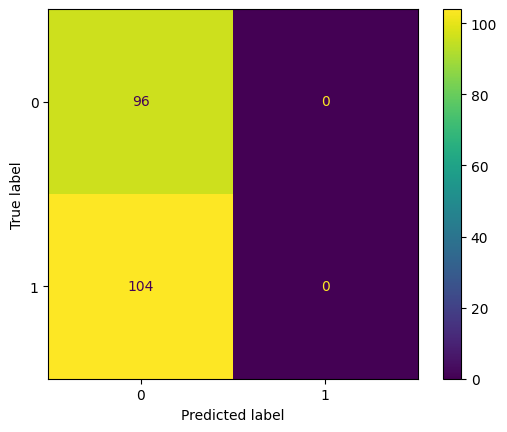

In [228]:
logistic, result_train_logistic, result_test_logistic = train_model(LogisticRegression(random_state=31), X_train, X_test, y_train, y_test)

In [229]:
crossval(logistic, X_train, y_train)

AUROC standard deviation (cross-val train): 0.006643806881490519
AUROC mean (cross-val train): 0.7675465604656303
AUROC mean (cross-val test): 0.7686885792701985


- Scaling

F1-Score (train)  : 0.9703989703989704
F1-Score (test)   : 0.966183574879227
Auroc (train)     : 0.971059605960596
Auroc (test)      : 0.9651442307692308


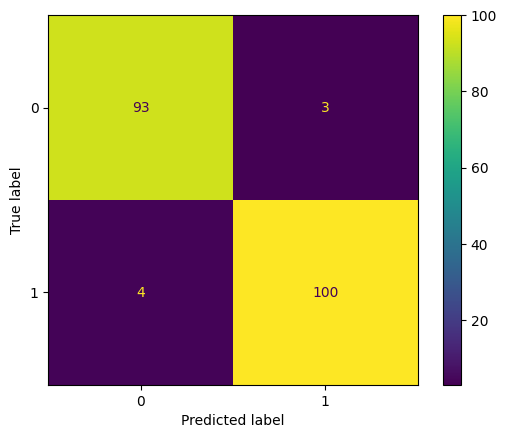

In [230]:
logistic_scaling, result_train_logistic_scaling, result_test_logistic_scaling = train_model(LogisticRegression(random_state=31), X_train_scaling, X_test_scaling, y_train, y_test)

In [231]:
crossval(logistic_scaling, X_train_scaling, y_train)

AUROC standard deviation (cross-val train): 0.0023602254031983485
AUROC mean (cross-val train): 0.9913018680033321
AUROC mean (cross-val test): 0.9891238523597436


### Decision Tree

- Non-Scaling

F1-Score (train)  : 1.0
F1-Score (test)   : 0.9473684210526315
Auroc (train)     : 1.0
Auroc (test)      : 0.9447115384615384


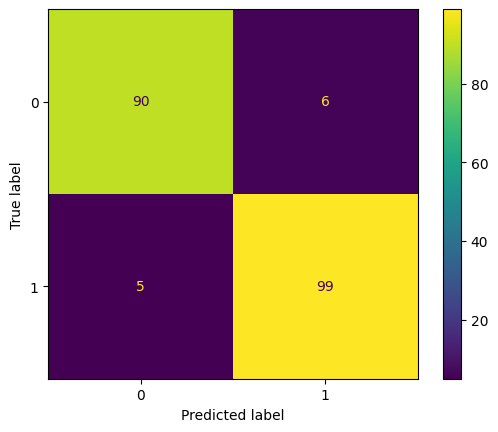

In [232]:
decisiontree, result_train_decisiontree, result_test_decisiontree = train_model(DecisionTreeClassifier(random_state=31), X_train, X_test, y_train, y_test)

In [233]:
crossval(decisiontree, X_train, y_train)

AUROC standard deviation (cross-val train): 0.0
AUROC mean (cross-val train): 1.0
AUROC mean (cross-val test): 0.9312722691045476


- Scaling

F1-Score (train)  : 1.0
F1-Score (test)   : 0.9473684210526315
Auroc (train)     : 1.0
Auroc (test)      : 0.9447115384615384


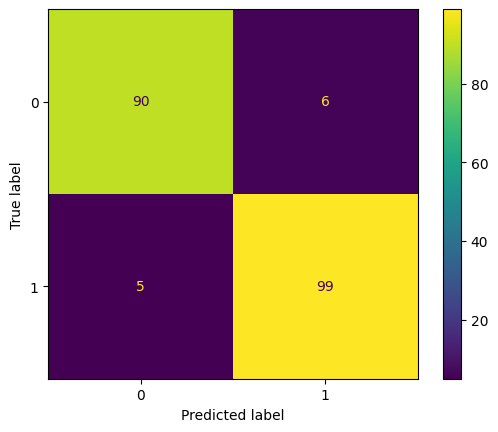

In [234]:
decisiontree_scaling, result_train_decisiontree_scaling, result_test_decisiontree_scaling = train_model(DecisionTreeClassifier(random_state=31), X_train_scaling, X_test_scaling, y_train, y_test)

In [235]:
crossval(decisiontree_scaling, X_train_scaling, y_train)

AUROC standard deviation (cross-val train): 0.0
AUROC mean (cross-val train): 1.0
AUROC mean (cross-val test): 0.9312722691045476


### K-Nearest Neighbors

- Non-Scaling

F1-Score (train)  : 0.7467018469656991
F1-Score (test)   : 0.6598984771573605
Auroc (train)     : 0.7595509550955095
Auroc (test)      : 0.6666666666666666


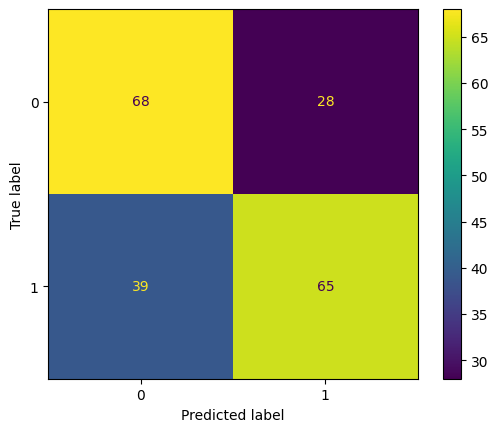

In [236]:
knn, result_train_knn, result_test_knn = train_model(KNeighborsClassifier(), X_train, X_test, y_train, y_test)

In [237]:
crossval(knn, X_train, y_train)

AUROC standard deviation (cross-val train): 0.008448973642097795
AUROC mean (cross-val train): 0.8501321329633102
AUROC mean (cross-val test): 0.6900221885255509


- Scaling

F1-Score (train)  : 0.949868073878628
F1-Score (test)   : 0.9393939393939394
Auroc (train)     : 0.9520702070207021
Auroc (test)      : 0.9419070512820512


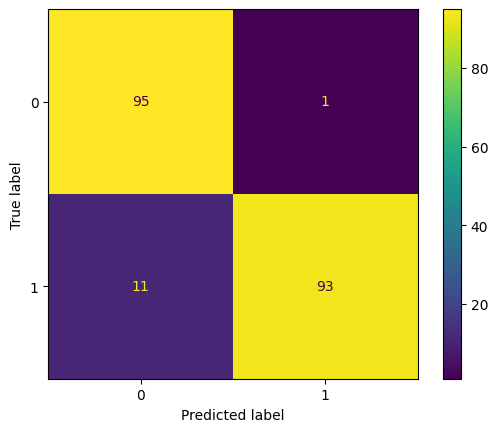

In [238]:
knn_scaling, result_train_knn_scaling, result_test_knn_scaling = train_model(KNeighborsClassifier(), X_train_scaling, X_test_scaling, y_train, y_test)

In [239]:
crossval(knn_scaling, X_train_scaling, y_train)

AUROC standard deviation (cross-val train): 0.0010265116167083416
AUROC mean (cross-val train): 0.9917120464165011
AUROC mean (cross-val test): 0.9668396429129551


### Random Forest

- Non-Scaling

F1-Score (train)  : 1.0
F1-Score (test)   : 0.966183574879227
Auroc (train)     : 1.0
Auroc (test)      : 0.9651442307692308


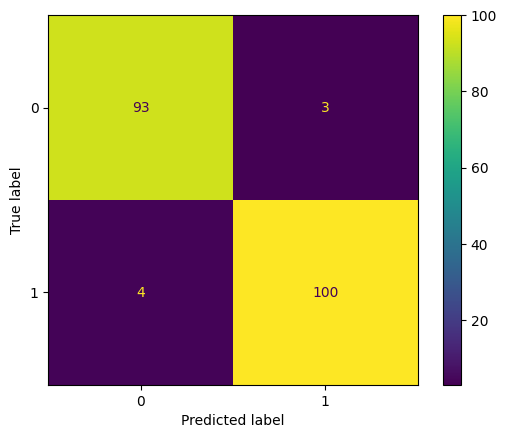

In [240]:
randomforest, result_train_randomforest, result_test_randomforest = train_model(RandomForestClassifier(random_state=31), X_train, X_test, y_train, y_test)

In [241]:
crossval(randomforest, X_train, y_train)

AUROC standard deviation (cross-val train): 0.0
AUROC mean (cross-val train): 1.0
AUROC mean (cross-val test): 0.9909208518909205


- Scaling

F1-Score (train)  : 1.0
F1-Score (test)   : 0.966183574879227
Auroc (train)     : 1.0
Auroc (test)      : 0.9651442307692308


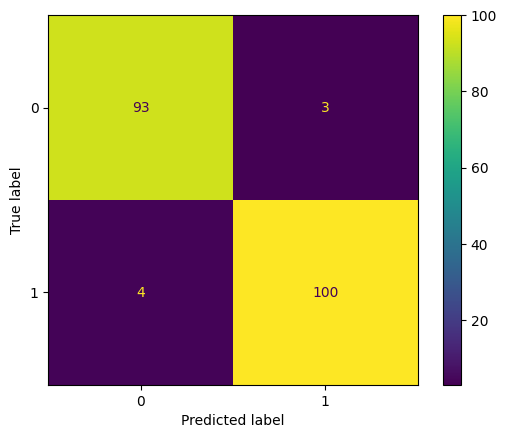

In [242]:
randomforest_scaling, result_train_randomforest_scaling, result_test_randomforest_scaling = train_model(RandomForestClassifier(random_state=31), X_train_scaling, X_test_scaling, y_train, y_test)

In [243]:
crossval(randomforest_scaling, X_train_scaling, y_train)

AUROC standard deviation (cross-val train): 0.0
AUROC mean (cross-val train): 1.0
AUROC mean (cross-val test): 0.9908583396819814


### Gradient Boost

- Non-Scaling

F1-Score (train)  : 0.9974683544303797
F1-Score (test)   : 0.966183574879227
Auroc (train)     : 0.9974747474747474
Auroc (test)      : 0.9651442307692308


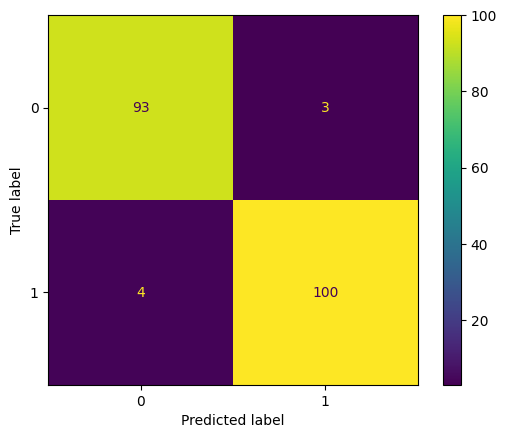

In [244]:
gradientboost, result_train_gradientboost, result_test_gradientboost = train_model(GradientBoostingClassifier(random_state=31), X_train, X_test, y_train, y_test)

In [245]:
crossval(gradientboost, X_train, y_train)

AUROC standard deviation (cross-val train): 0.0
AUROC mean (cross-val train): 1.0
AUROC mean (cross-val test): 0.9874676365447727


- Scaling

F1-Score (train)  : 0.9974683544303797
F1-Score (test)   : 0.966183574879227
Auroc (train)     : 0.9974747474747474
Auroc (test)      : 0.9651442307692308


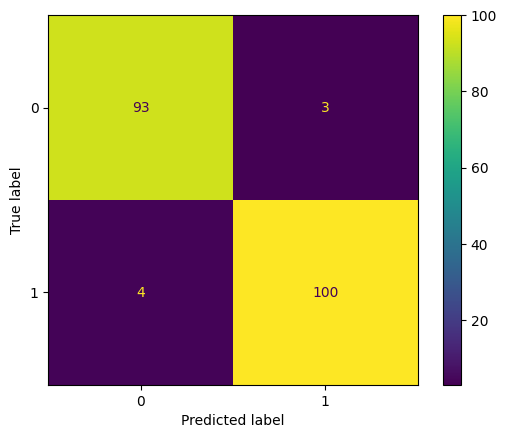

In [246]:
gradientboost_scaling, result_train_gradientboost_scaling, result_test_gradientboost_scaling = train_model(GradientBoostingClassifier(random_state=31), X_train_scaling, X_test_scaling, y_train, y_test)

In [247]:
crossval(gradientboost_scaling, X_train_scaling, y_train)

AUROC standard deviation (cross-val train): 0.0
AUROC mean (cross-val train): 1.0
AUROC mean (cross-val test): 0.9874676365447727


## Best Model

In [248]:
modelName = [
    'Logistic Regression', 'Logistic Regression Scaling',
    'K-Nearest Neighbors', 'K-Nearest Neighbors Scaling', 
    'Decision Tree', 'Decision Tree Scaling',
    'Random Forest', 'Random Forest Scaling',
    'Gradient Boost', 'Gradient Boost Scaling']
result = [[result_train_logistic[1], result_train_logistic_scaling[1],
           result_train_knn[1], result_train_knn_scaling[1],
           result_train_decisiontree[1], result_train_decisiontree_scaling[1],
           result_train_randomforest[1], result_train_randomforest_scaling[1],
           result_train_gradientboost[1], result_train_gradientboost_scaling[1]], 
          [result_test_logistic[1], result_test_logistic_scaling[1],
           result_test_knn[1], result_test_knn_scaling[1],
           result_test_decisiontree[1], result_test_decisiontree_scaling[1],
           result_test_randomforest[1], result_test_randomforest_scaling[1],
           result_test_gradientboost[1], result_test_gradientboost_scaling[1]]]
df_result = pd.DataFrame(result, columns=modelName, index=['Train', 'Test'])
df_result

,Logistic Regression,Logistic Regression Scaling,K-Nearest Neighbors,K-Nearest Neighbors Scaling,Decision Tree,Decision Tree Scaling,Random Forest,Random Forest Scaling,Gradient Boost,Gradient Boost Scaling
Train,0.5,0.971060,0.759551,0.952070,1.000000,1.000000,1.000000,1.000000,0.997475,0.997475
Test,0.5,0.965144,0.666667,0.941907,0.944712,0.944712,0.965144,0.965144,0.965144,0.965144


- In general, scaling the data produces better results compared to not scaling, as it ensures equal consideration of features by the model (excluding models robust to outliers). 
- The Random Forest Classifier outperforms other models, achieving best performance with a training data score of 1 and a testing data score of 0.965144. 
These findings emphasize the effectiveness of feature scaling and the superiority of the Random Forest Classifier in this dataset.

F1-Score (train)  : 1.0
F1-Score (test)   : 0.966183574879227
Auroc (train)     : 1.0
Auroc (test)      : 0.9651442307692308


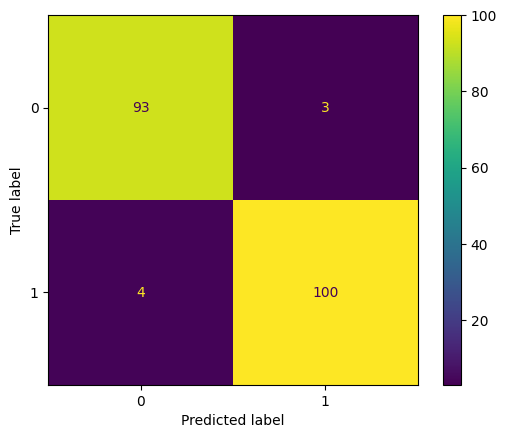

In [249]:
randomforest, result_train_randomforest, result_test_randomforest = train_model(RandomForestClassifier(random_state=31), X_train, X_test, y_train, y_test)

According to the confusion matrix, the model misclassified 7 out of 200 data points. While any misclassification is notable, the relatively small number suggests that the model performs well in predicting whether a customer will click on ads or not. This accuracy is beneficial as it contributes to more precise targeting of ads to customers, ultimately improving the effectiveness of the advertising strategy.

### Feature Importance

In [250]:
explainer = shap.Explainer(
    randomforest, X_train, feature_names=X_train.columns.to_list()
)
shap_values = explainer(X_test)

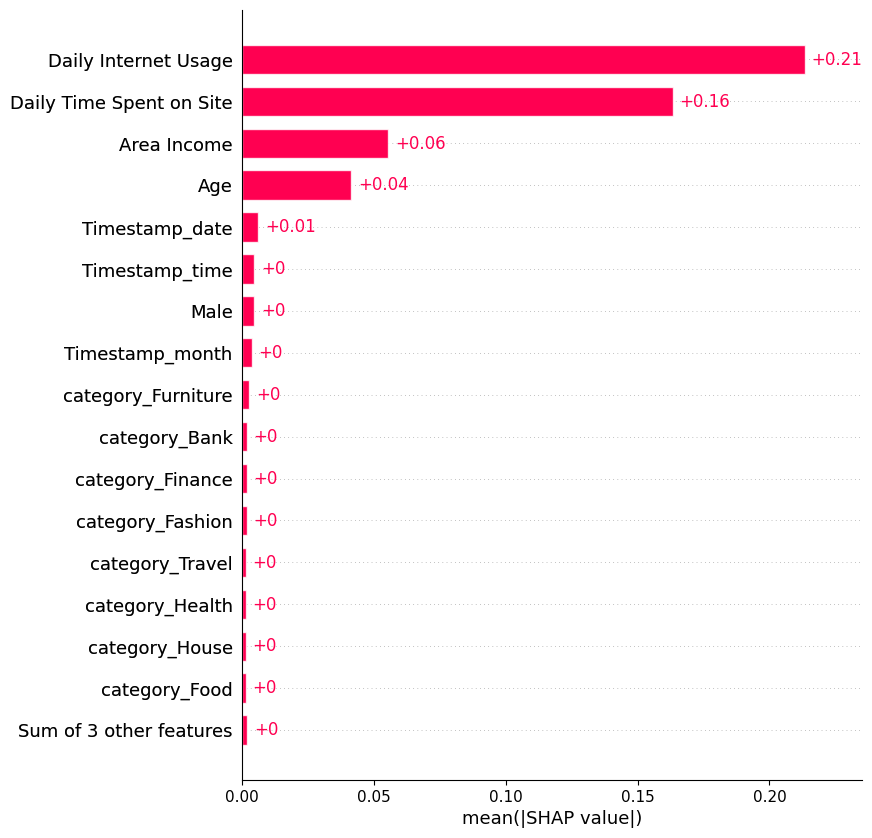

In [257]:
shap.plots.bar(shap_values[:, :, 1], max_display=17)

According to feature importance analysis using SHAP values in the Random Forest model, two features stand out with significantly different values compared to others: 'Daily Internet Usage' and 'Daily Time Spent on Site.' These features warrant special attention in target marketing strategies due to their notable impact on the model's predictions. Understanding the influence of these features can help optimize advertising efforts and enhance the effectiveness of targeted marketing initiatives.

---
## Stage 4: Business Recomendation And Simulation
---

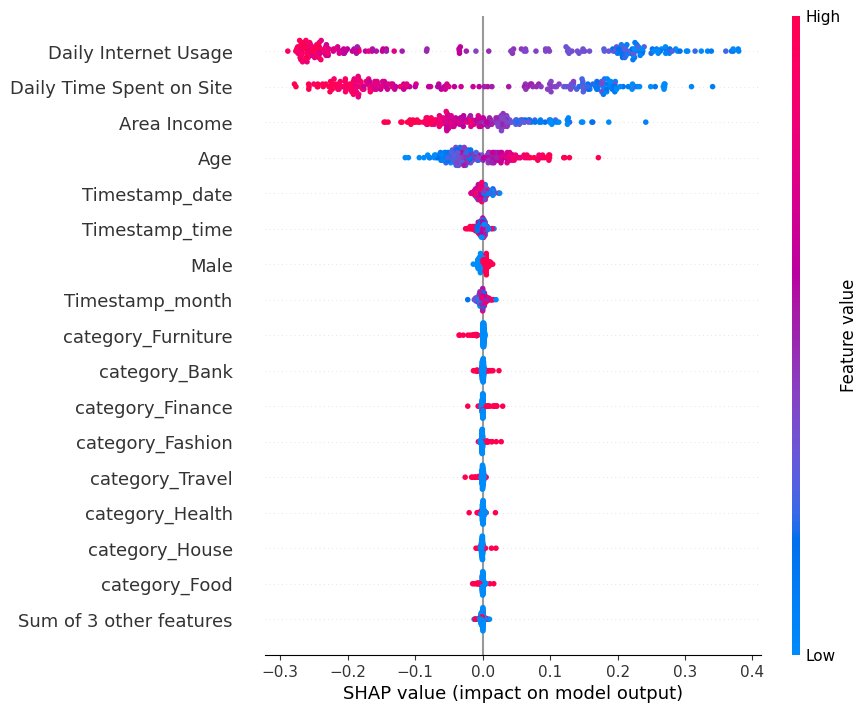

In [259]:
shap.plots.beeswarm(shap_values[:, :, 1], max_display=17)

## Business Recommendation

Based on the Feature Importance analysis, the following business recommendations are suggested for targeted marketing:

- **Daily Internet Usage:**
  - Utilize Daily Internet Usage as a pivotal factor for predicting customer ad engagement. Customers with lower daily Internet usage are more likely to click on ads, making them prime candidates for targeted advertising. Tailor ad content and strategies to capture the attention of this specific segment.

- **Daily Time Spent on Site:**
  - Similar to Daily Internet Usage, consider Daily Time Spent on Site as a significant indicator. Customers with lower time spent on the site are more inclined to click on ads. Design targeted campaigns to attract the attention of this audience.

- **Area Income:**
  - Focus marketing efforts on customers with lower area income, as this group exhibits a higher likelihood of clicking on ads. Tailor promotions or offers to resonate with the preferences and needs of this income segment.

- **Age:**
  - Target older customer demographics for advertising campaigns, as older age groups are more likely to engage with ads. Craft marketing messages and visuals that resonate with the interests and preferences of this age segment.

These recommendations aim to optimize targeted marketing efforts by aligning strategies with the features that exhibit the highest importance in predicting ad engagement.

## Business Simulation

**Assumption**
- The cost of giving ads to customers is Rp. 500.00.
- Revenue from clicked ads is Rp. 2000.00.

**Without Model:**
Without a model, assuming that only 50% of customers click on ads, and with a total of 200 customers, the ads would be given to all customers as there is no prediction available on which customers are more likely to click the ads.

Calculation:
- **Cost:** Cost of giving ads × Number of customers = Rp. 500 × 200 = Rp. 100,000.00
- **Revenue:** Rp. 2000 × (50% of 200) = Rp. 200,000.00
- **Profit:** Revenue - Cost = Rp. 200,000.00 - Rp. 100,000.00 = **Rp. 100,000.00**

**With Model:**
With a model, assuming the model predicts 103 customers as good candidates (with a total of 200 customers) for clicking the ads with an accuracy of 100 out of 103 predicted correctly. Using the model, ads are only given to the predicted good candidates.

Calculation:
- **Cost:** Cost of giving ads × Number of predicted good customers = Rp. 500 × 103 = Rp. 51,500.00
- **Revenue:** Rp. 2000 × 100 = Rp. 200,000.00
- **Profit:** Revenue - Cost = Rp. 200,000.00 - Rp. 51,500.00 = **Rp. 148,500.00**

By utilizing the model, the potential profit can be enhanced by Rp. 48,500.00 (48.5%) compared to the situation without the model. This improvement stems from the model's capacity to predict and focus on customers with a higher likelihood of clicking on ads. As a result, the allocation of advertising resources becomes more optimized, leading to an overall increase in the efficiency of the marketing strategy.